# Proof of Concept of a Nonlinear Structural Stability Constraint for Aeroelastic Optimization

***

This notebook shows how to produce the figures published in the paper titled _Proof of Concept of a Nonlinear Structural Stability Constraint for Aeroelastic Optimization_, presented at the RAeS 8th Aircraft Structural Design Conference in October 2023 and then submitted for a special edition of The Aeronautical Journal. The paper is authored by Francesco M. A. Mitrotta, Alberto Pirrera, Terence Macquart, Jonathan E. Cooper, Alex Pereira do Prado and Pedro Higino Cabral.

* [Nonlinear structural stability of canonical examples](#canonical-examples)
    * [Supercritical pitchfork bifurcation](#supercritical-pitchfork)
    * [Broken supercritical pitchfork](#broken-pitchfork)
    * [Limit point bifurcation](#limit-point)
* [Nonlinear structural stability of the CRM-like box beam](#crm-like-box-beam)
* [Optimization of the CRM-like box beam with nonlinear structural stability constraints](#optimization)

In [1]:
import os  # package for interacting with the operating system
import matplotlib.pyplot as plt  # package for creating figures and plots
from matplotlib.lines import Line2D  # class holding the list of markers
import tol_colors as tc  # package for colorblind-friendly colors
import numpy as np  # package for scientific computing

# Define name of directory where to find the analyses
NOTEBOOK_18_DIRECTORY_PATH = os.path.join(
    os.getcwd(), "analyses", "18_Development_and_Nonlinear_Structural_Stability_Analysis_of_a_CRM-like_Box_Beam_Model")
NOTEBOOK_19_DIRECTORY_PATH = os.path.join(
    os.getcwd(), "analyses", "19_One-variable_Optimization_of_the_CRM-like_Box_Beam")

# Define name of directory where to save figures
figures_directory_name = "Proof_of_Concept_of_a_Nonlinear_Structural_Stability_Constraint_for_Aeroelastic_Optimization"
FIGURES_DIRECTORY_PATH = os.path.join(os.getcwd(), "analyses", figures_directory_name)

# Define default figure parameters
TEXTWIDTH_INCHES = 5.146571  # paper textwidth in inches
FIG_WIDTH_INCHES = TEXTWIDTH_INCHES*.6
FIG_HEIGHT_INCHES = FIG_WIDTH_INCHES*(4.8/6.4)  # default figure height in inches
DEFAULT_FONT_SIZE = 8  # default font size of figures (normalsize in LaTeX)
DEFAULT_MARKER_SIZE = 3  # default marker size of lines
plt.rcParams.update({
    'figure.dpi': 120,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': "Times New Roman",
    'font.size': DEFAULT_FONT_SIZE,               # Default font size
    'figure.figsize': (FIG_WIDTH_INCHES, FIG_HEIGHT_INCHES),  # Default figure size (width x height)
    'text.latex.preamble': r'\usepackage{amsmath, amssymb}',  # Add common LaTeX packages
    'lines.markersize': DEFAULT_MARKER_SIZE  # set default marker size of lines
})

# Define default colors and markers
MARKERS = list(Line2D.markers.keys())[2:]  # list of marker characters
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('bright'))))  # set default color cycle to TOL bright
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']  # retrieve list with succession of standard matplotlib colors
UNSTABLE_COLOR = COLORS[1]  # red
GLASS_CEILING_COLOR = COLORS[2]  # green
del COLORS[1:3]  # delete green and red from list of colors

# Define default print options for numpy
np.set_printoptions(precision=1, suppress=True)

# Define constant variables for the analyses
L = 29.38e3  # [mm] box beam length
W = 3.41e3   # [mm] box beam width
H = .77e3    # [mm] box beam height
FIRST_SUBCASE_ID = 1  # id of first subcase
SECOND_SUBCASE_ID = 2  # id of second subcase
Z_COMPONENT_INDEX = 2  # index of z-component in vector of displacements
DESIGN_LOAD = 12517  # [N]

# Define function to adjust axes ticks and labels' position
def adjust_3d_plot(axes, colorbar=None):
    axes.locator_params(axis="x", nbins=3)  # set number of ticks of x-axis
    axes.locator_params(axis="z", nbins=2)  # set number of ticks of z-axis
    axes.tick_params(axis="y", which="major", pad=25)  # adjust position of ticks' label of y-axis
    axes.tick_params(axis="z", which="major", pad=6)  # adjust position of ticks' label of z-axis
    axes.yaxis.labelpad = 90  # adjust position of y-axis's label
    axes.zaxis.labelpad = 10  # adjust position of z-axis's label
    if colorbar is not None:
        colorbar.ax.set_position(colorbar.ax.get_position().shrunk(1.0, .62))  # decrease colorbar size
        colorbar.ax.set_position(colorbar.ax.get_position().translated(-.07, .18))  # move colorbar upwards

## Nonlinear structural stability of canonical examples <a name="canonical-examples"></a>

***

### Supercritical pitchfork bifurcation <a name="supercritical-pitchfork"></a>

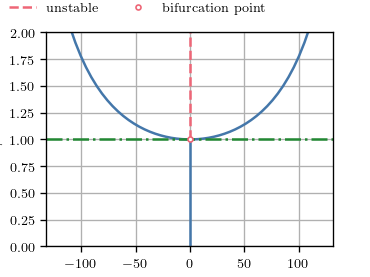

In [2]:
%matplotlib widget

# Plot trivial stable solution of perfect system
fig, ax = plt.subplots()
theta_trivial_stable = np.array([0., 0.])  # deg
load_trivial_stable = np.array([0., 1.])
stable_line = ax.plot(theta_trivial_stable, load_trivial_stable, label="stable")

# Plot nontrivial stable solution of perfect system
theta_max = 120  # deg
theta_nontrivial = np.linspace(-theta_max, theta_max)  # deg
load_nontrivial = np.deg2rad(theta_nontrivial)/np.sin(np.deg2rad(theta_nontrivial))
ax.plot(theta_nontrivial, load_nontrivial, color=stable_line[0].get_color())

# Plot trivial unstable solution of perfect system
theta_trivial_unstable = np.array([0., 0.])  # deg
load_trivial_unstable = np.array([1., np.max(load_nontrivial)])
ax.plot(theta_trivial_unstable, load_trivial_unstable, UNSTABLE_COLOR, linestyle='--', label="unstable")

# Plot glass ceiling of linear buckling
ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle='-.', label="glass ceiling of linear buckling")

# Plot bifurcation point
ax.plot(0, 1, 'o', mec=UNSTABLE_COLOR, mfc='w', label="bifurcation point")

# Set plot appearance
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
ax.grid()
fig.legend(loc="upper center", bbox_to_anchor=(0.48, 1.1), ncol=2, frameon=False)
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "SupercriticalPitchforkBifurcation.pdf"), bbox_inches='tight', pad_inches=0)

### Broken supercritical pitchfork <a name="broken-pitchfork"></a>

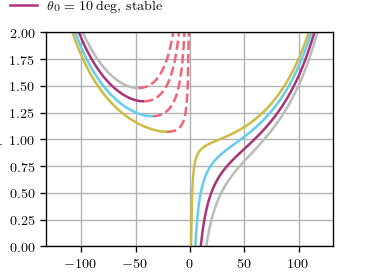

In [3]:
from matplotlib.lines import Line2D  # package for custom legend

color_starting_index = 1  # index of first color to use for plotting
imperfections = [1, 5, 10, 15]  # [deg]
fig, ax = plt.subplots()
for count, theta_0 in enumerate(imperfections):  # iterate through initial angles theta_0
    theta_negative = np.arange(-theta_max, 0)
    theta_positive = np.arange(theta_0, theta_max + 1)
    load_theta_negative = np.deg2rad(theta_negative - theta_0)/np.sin(np.deg2rad(theta_negative))
    load_theta_positive = np.deg2rad(theta_positive - theta_0)/np.sin(np.deg2rad(theta_positive))
    stability_theta_negative = np.deg2rad(theta_negative - theta_0)/np.tan(np.deg2rad(theta_negative))
    ax.plot(theta_negative[stability_theta_negative<1], load_theta_negative[stability_theta_negative<1],
    color=COLORS[color_starting_index + count], label=f"$\\theta_0={theta_0:d}\,\mathrm{{deg}}$, stable")
    ax.plot(theta_negative[stability_theta_negative>1], load_theta_negative[stability_theta_negative>1], UNSTABLE_COLOR, linestyle="--")
    ax.plot(theta_positive, load_theta_positive, color=COLORS[color_starting_index + count])
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color=UNSTABLE_COLOR, linestyle='--', label="unstable"))
labels.append("unstable")
ax.legend(handles=handles, labels=labels, loc="upper center", bbox_to_anchor=(0.45, 1.38), ncol=2, frameon=False)
ax.grid()
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "BrokenSupercriticalPitchfork.pdf"), bbox_inches='tight', pad_inches=0)

### Limit point bifurcation <a name="limit-point"></a>

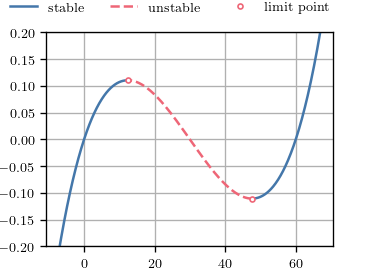

In [4]:
alpha_0 = 30  # deg
theta_max = 37  # deg
step = 0.1  # deg
theta = np.arange(-theta_max, theta_max + step, step)  # deg

nondimensional_load = 4 * (np.sin(np.deg2rad(theta)) - np.cos(np.deg2rad(alpha_0)) * np.tan(np.deg2rad(theta)))
stability = (np.cos(np.deg2rad(alpha_0)) - np.cos(np.deg2rad(theta))**3) / np.cos(np.deg2rad(theta))

# Create an array for alpha_0 - theta
alpha_minus_theta = alpha_0 - theta

# Split data into segments with the same sign of stability
segments = []
current_segment_indices = []
limit_point_indices = []
for i in range(len(alpha_minus_theta)):
    if i == 0 or np.sign(stability[i]) == np.sign(stability[i - 1]):
        current_segment_indices.append(i)
    else:
        segments.append(current_segment_indices)
        current_segment_indices = [i]
        limit_point_indices.append(i - 1)  # the limit point is taken as the last point with same stability for visualization purposes
segments.append(current_segment_indices)  # Append the last segment

# Create a figure and axis
fig, ax = plt.subplots()

# Plot line segments separately based on stability sign
for segment in segments:
    if stability[segment[0]] >= 0:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=COLORS[0])
    else:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=UNSTABLE_COLOR, linestyle="--")
ax.plot(alpha_minus_theta[limit_point_indices], nondimensional_load[limit_point_indices], "o", mec=UNSTABLE_COLOR, mfc="w")

# Label the axes and set limts
plt.xlabel("$\\alpha_0 - \\theta,\,\mathrm{deg}$")
plt.ylabel("$P/kl$")
plt.ylim([-0.2, 0.2])

# Create proxy artists for the legend
stable_line = Line2D([0], [0], color=COLORS[0], label="stable")
unstable_line = Line2D([0], [0], color=UNSTABLE_COLOR, linestyle='--', label="unstable")
limit_point = Line2D([0], [0], marker='o', mec=UNSTABLE_COLOR, mfc='w', linestyle='None', label="limit point")

# Display the legend with the proxy artists
plt.legend(handles=[stable_line, unstable_line, limit_point], ncol=3, loc="upper center", bbox_to_anchor=(0.43, 1.2), frameon=False)

# Show the plot
plt.grid(True)
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "LimitPointBifurcation.pdf"), bbox_inches='tight', pad_inches=0)

Plot two limit point bifurcations side by side.

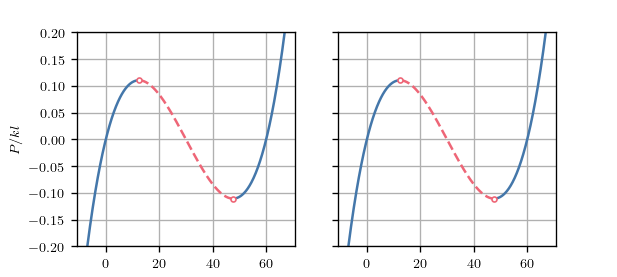

In [5]:
# Create a figure and two subplots side by side, sharing the y-axis
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(TEXTWIDTH_INCHES, FIG_HEIGHT_INCHES))

# Plot line segments separately based on stability sign in both subplots
for ax in axs:
    for segment in segments:
        if stability[segment[0]] >= 0:
            ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=COLORS[0])
        else:
            ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=UNSTABLE_COLOR, linestyle='--')
    ax.plot(alpha_minus_theta[limit_point_indices], nondimensional_load[limit_point_indices], 'o', mec=UNSTABLE_COLOR, mfc='w')
    # Label the axes and set limits for both subplots
    ax.set_xlabel("$\\alpha_0 - \\theta,\,\mathrm{deg}$")
    ax.set_ylim([-0.2, 0.2])
    ax.grid(True)

# Label the y-axis only for the left subplot
axs[0].set_ylabel("$P/kl$")

# Show the plot
plt.grid(True)
plt.show()

# Save the figure (You might need to define ANALYSIS_DIRECTORY_PATH)
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "LimitPointBifurcationSideBySide.pdf"), bbox_inches='tight', pad_inches=0)

## Nonlinear structural stability of a CRM-like box beam <a name="crm-like-box-beam"></a>

***

Geometrical and material properties.

In [6]:
t = H/100  # [mm] initial box beam thickness
stiffeners_height = H/10  # [mm] stiffeners height
no_stiffeners = 2  # number of stiffeners
stiffeners_x_locations = np.linspace(0, W, no_stiffeners + 2)[1:-1]  # [mm] stiffeners x-coordinates
stiffeners_spacing = W/(no_stiffeners + 1)  # [mm] stiffeners spacing
ribs_spacing = stiffeners_spacing*1.4 # [mm] ribs spacing
no_ribs = round(L/ribs_spacing) + 1  # number of ribs
ribs_y_locations = np.linspace(0, L, no_ribs)  # [mm] ribs y-coordinates
print(f"Number of stiffeners per skin: {no_stiffeners:d}\nNumber of ribs: {no_ribs:d}")  # print number of stiffeners and ribs
rho = 2780e-12  # density [tons/mm^3]
E = 73.1e3  # Young's modulus [MPa]
nu = 0.3  # Poisson's ratio
SIGMA_Y = 420.  # yield strength [MPa]

Number of stiffeners per skin: 2
Number of ribs: 19


Plot the external geometry.

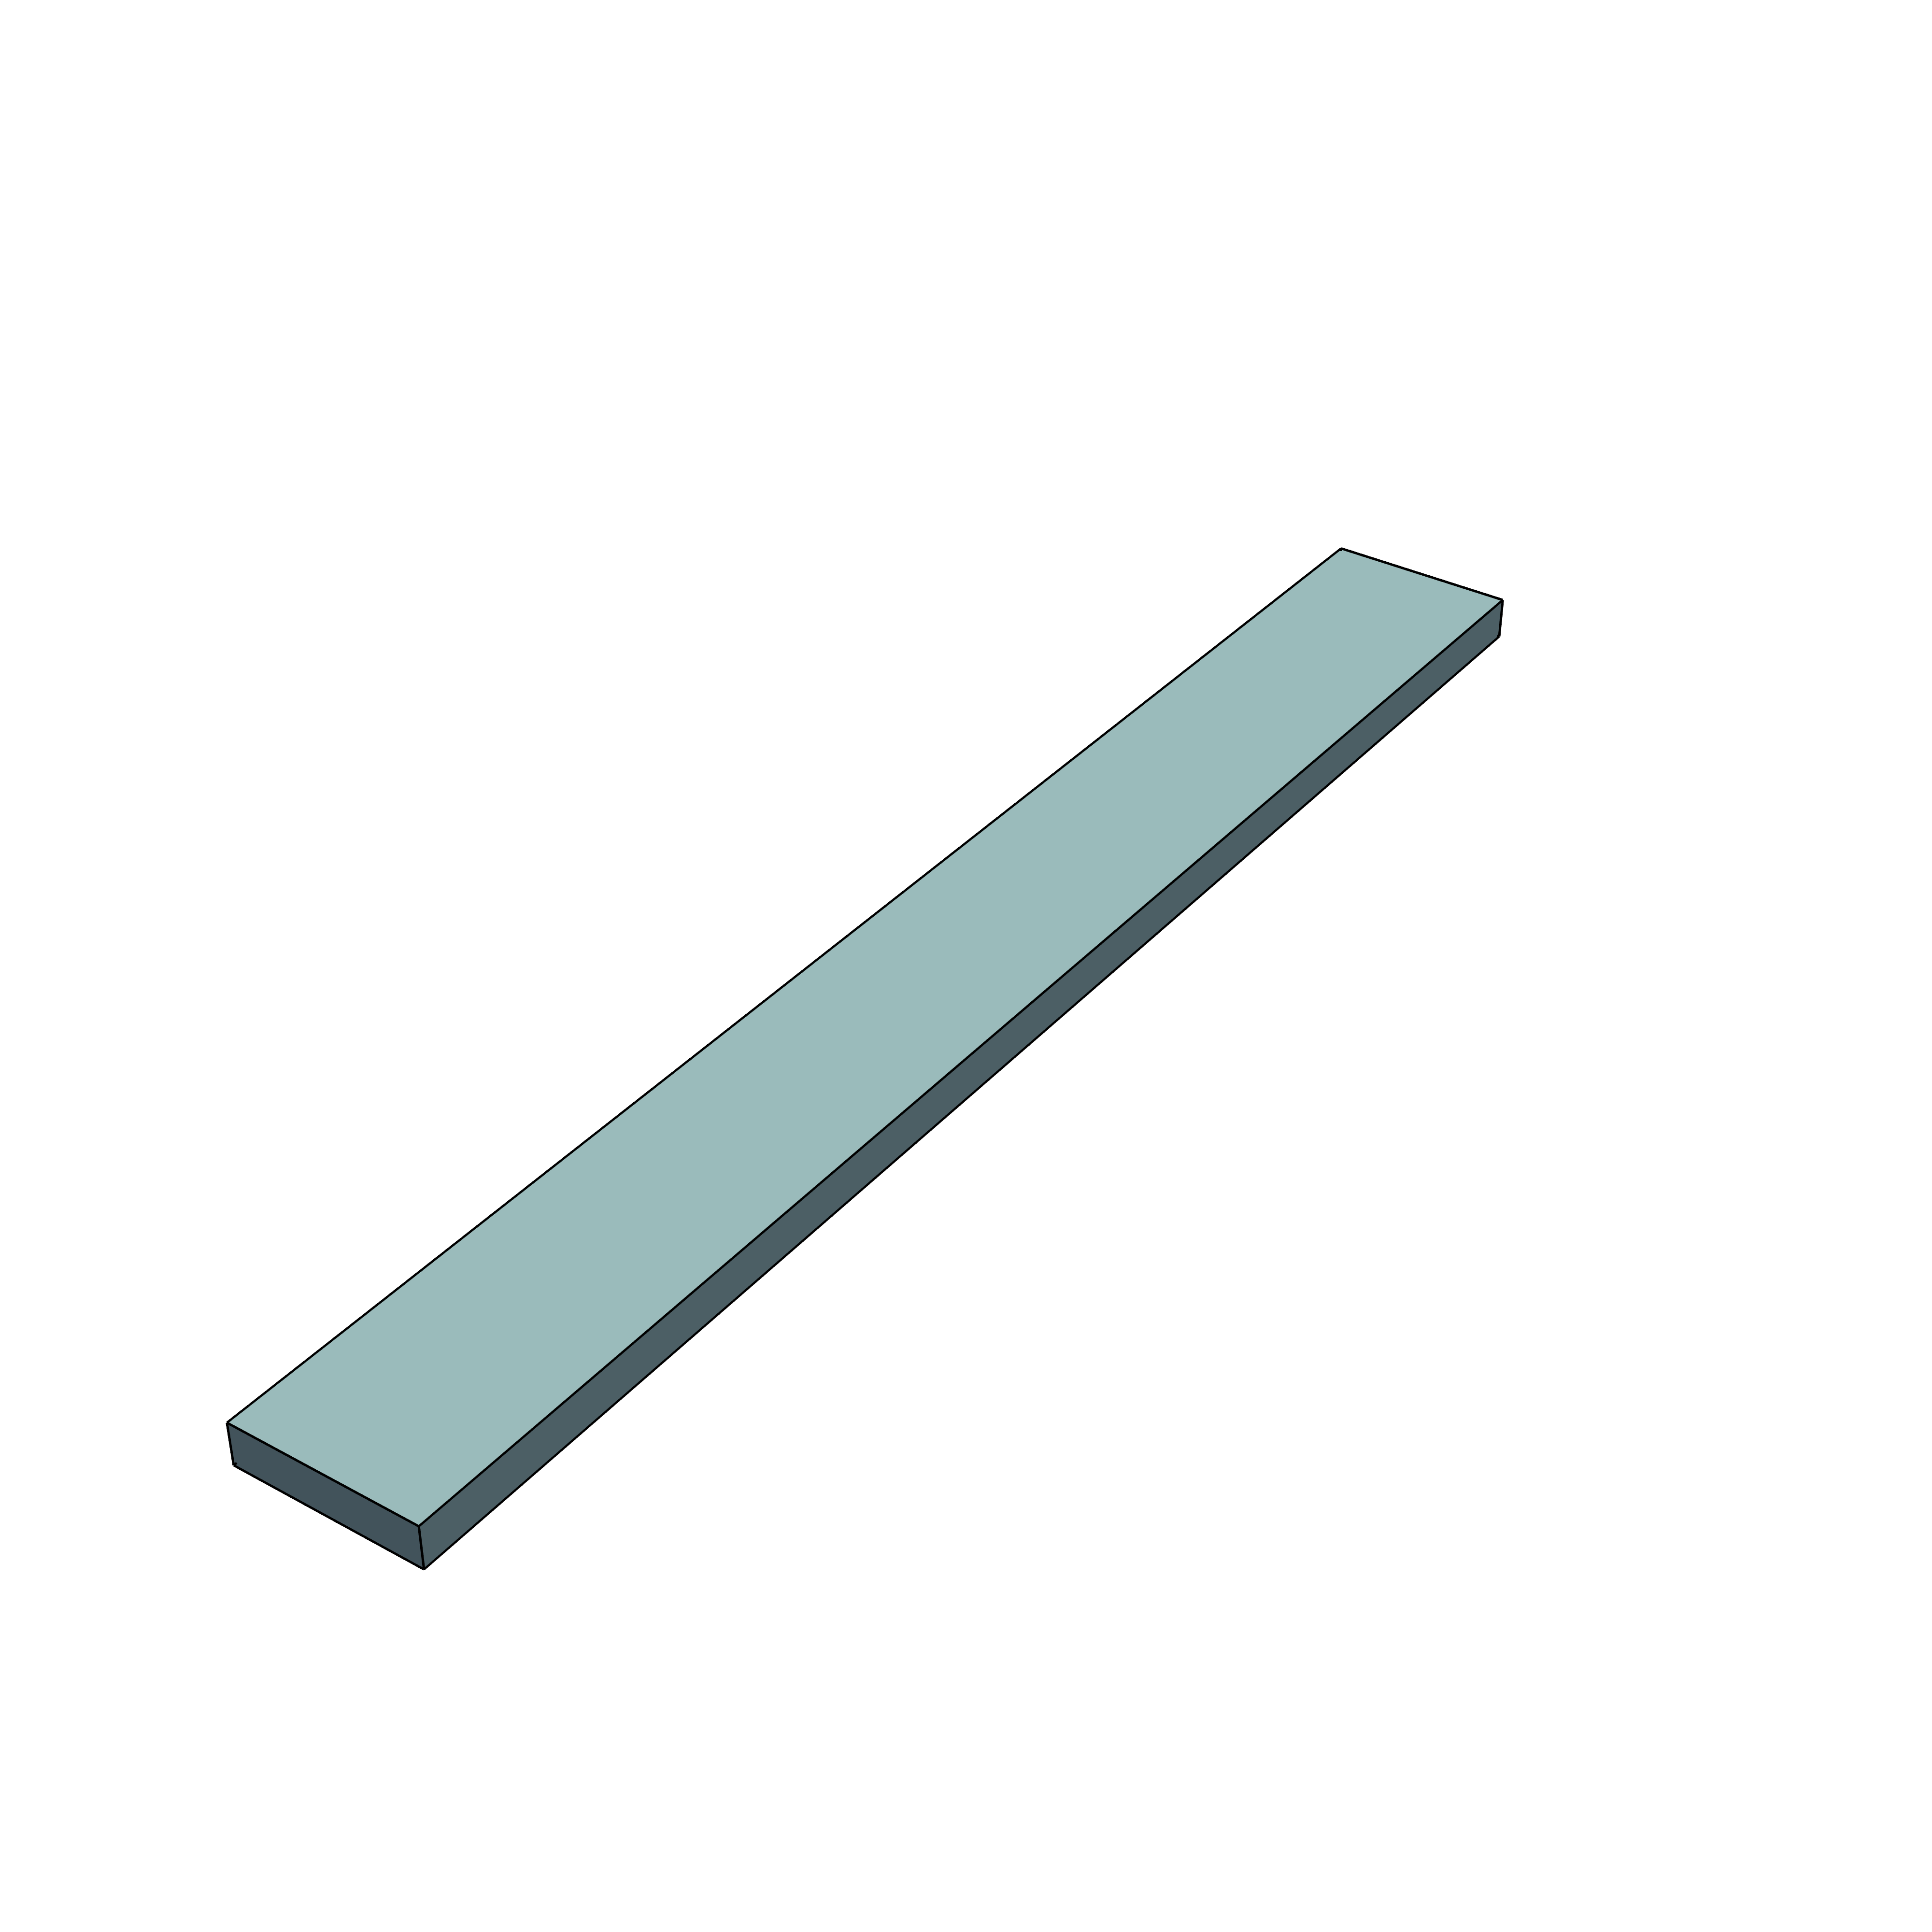

In [7]:
import pyvista
from resources import box_beam_utils

# Set global theme for pyvista
pyvista.global_theme.transparent_background = True

# Discretize top and bottom skin
top_skin = pyvista.Plane(center=[W/2, L/2, H/2], direction=[0, 0, 1], i_size=W, j_size=L, i_resolution=1, j_resolution=1)
bottom_skin = pyvista.Plane(center=[W/2, L/2, -H/2], direction=[0, 0, -1], i_size=W, j_size=L, i_resolution=1, j_resolution=1)

# Discretize front and rear spar
front_spar = pyvista.Plane(center=[0, L/2, 0], direction=[-1, 0, 0], i_size=H, j_size=L, i_resolution=1, j_resolution=1)
rear_spar = pyvista.Plane(center=[W, L/2, 0], direction=[1, 0, 0], i_size=H, j_size=L, i_resolution=1, j_resolution=1)

# Discretize root and tip ribs
root_rib = pyvista.Plane(center=[W/2, 0, 0], direction=[0, -1, 0], i_size=H, j_size=W, i_resolution=1, j_resolution=1)
tip_rib = pyvista.Plane(center=[W/2, L, 0], direction=[0, 1, 0], i_size=H, j_size=W, i_resolution=1, j_resolution=1)

# Merge parts together and plot
merged_parts = top_skin.merge([bottom_skin] + [front_spar] + [rear_spar] + [root_rib] + [tip_rib])
pl = pyvista.Plotter(notebook=True, window_size=[4000, 4000])
pl.add_mesh(merged_parts, show_edges=True, line_width=5)
pl.camera.azimuth = 80
pl.show(jupyter_backend='static', screenshot=os.path.join(FIGURES_DIRECTORY_PATH, "ExternalGeometry.png"))

Plot internal geometry.

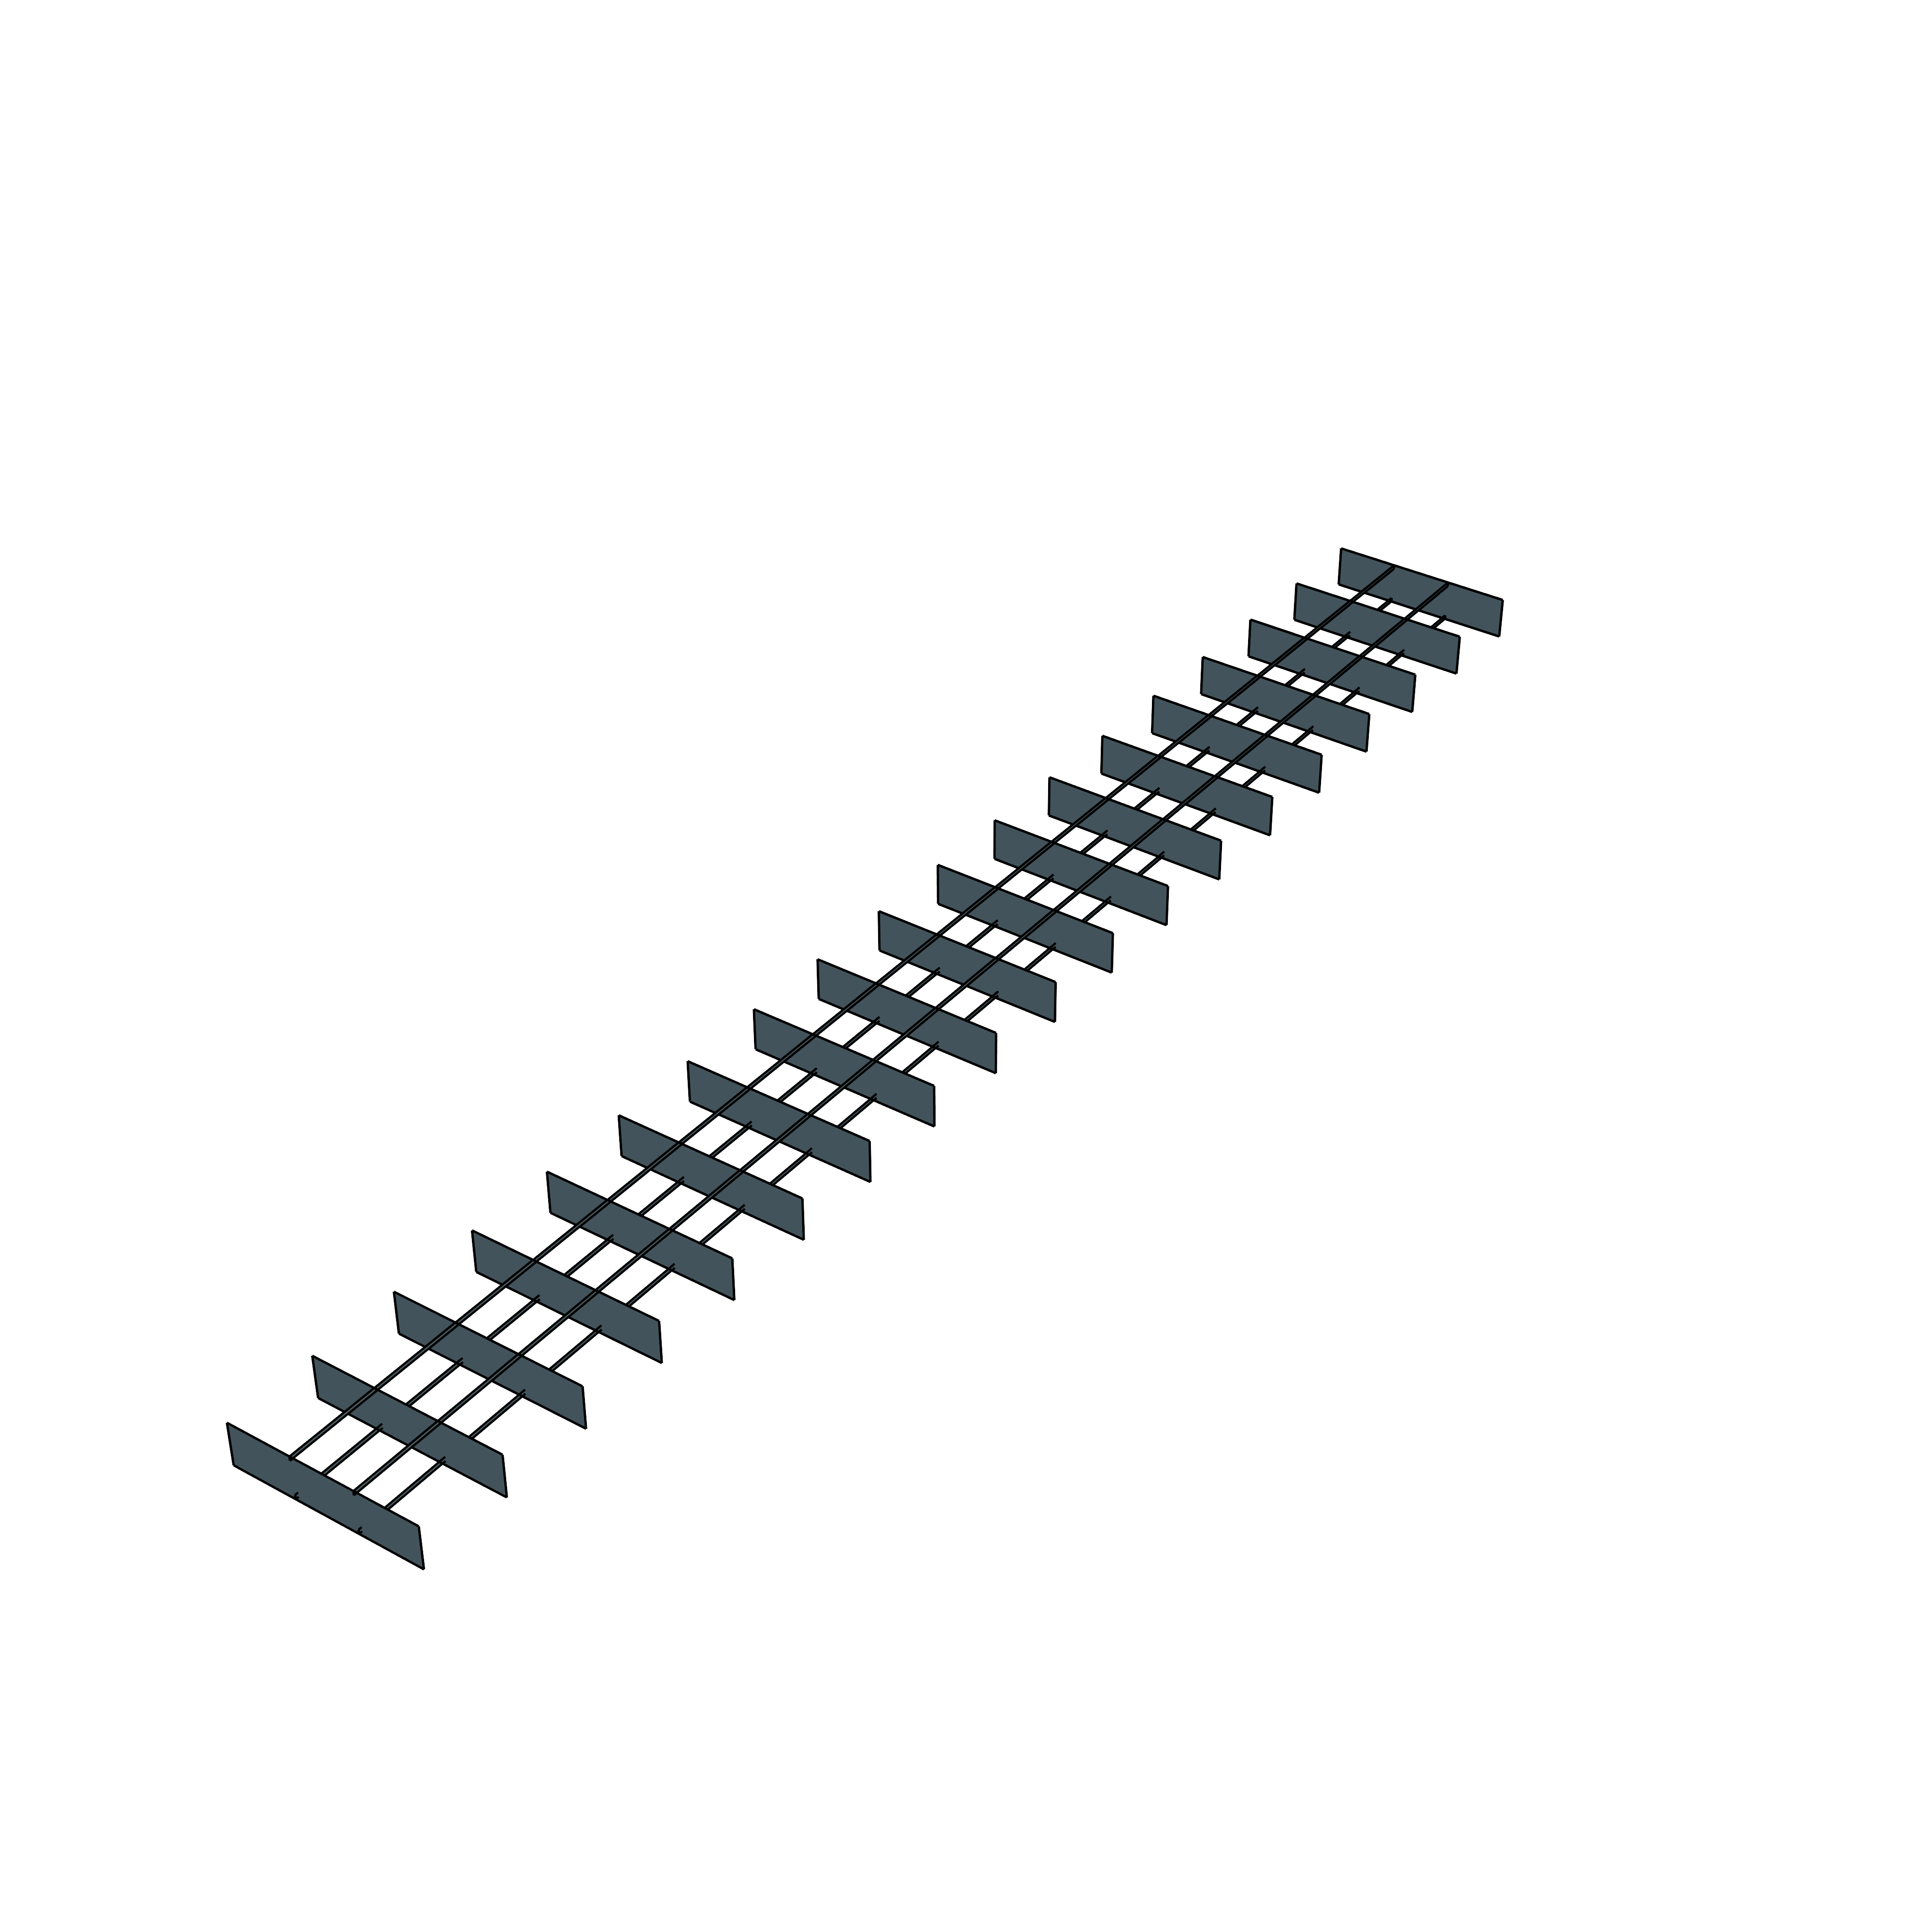

In [8]:
# Initialize lists of the PolyData objects corresponding to the box segments and to the ribs
ribs = []
rib_segments_x_coordinates = np.concatenate(([0.], stiffeners_x_locations, [W]))  # create array of the x-coordiantes defining the rib segments
rib_segments_widths = np.ediff1d(rib_segments_x_coordinates)  # calculate the width of each rib segment
# Iterate through the y-coordinates of the rib, except last one
for y in ribs_y_locations:
    # Discretize current rib and add PolyData object to the list
    ribs = ribs + [pyvista.Plane(center=[W/2, y, 0], direction=[0, 1, 0], i_size=H, j_size=W, i_resolution=1, j_resolution=1)]
# Initialize lists of the PolyData objects corresponding to the stiffeners
top_stiffeners = []
bottom_stiffeners = []
# Iterate through the x-coordinates of the stiffeners, except last one
for count, x in enumerate(stiffeners_x_locations):
    # Discretize top stiffener
    top_stiffeners.append(pyvista.Plane(center=[x, L/2, H/2 - stiffeners_height/2], direction=[1, 0, 0], i_size=stiffeners_height, j_size=L,
                                        i_resolution=1, j_resolution=1))
    # Discretize bottom stiffener
    bottom_stiffeners.append(pyvista.Plane(center=[x, L/2, -H/2 + stiffeners_height/2], direction=[1, 0, 0], i_size=stiffeners_height,
                                           j_size=L, i_resolution=1, j_resolution=1))
# Merge all box segments and ribs together
merged_parts = ribs[0].merge(ribs[1:] + top_stiffeners + bottom_stiffeners)
pl = pyvista.Plotter(notebook=True, window_size=[4000, 4000])
pl.add_mesh(merged_parts, show_edges=True, line_width=5)
pl.camera.azimuth = 80
pl.show(jupyter_backend="static", screenshot=os.path.join(FIGURES_DIRECTORY_PATH, "InternalGeometry.png"))

Mesh convergence.

subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping
subcase=0 already exists...skipping


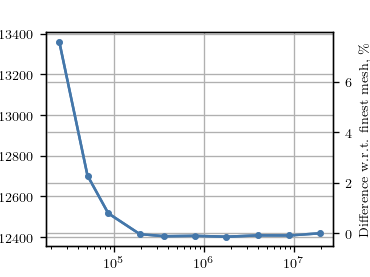

In [9]:
from pyNastran.op2.op2 import read_op2

# Define shell elements' lengths to be used for the mesh convergence study and print them to screen
shell_element_lengths = np.geomspace(H/2, stiffeners_height/8, 10) # [mm]

# Initialize arrays with number of elements, number of degrees of freedom and linear buckling loads
no_elements = np.empty(np.shape(shell_element_lengths), dtype=int)
dofs = np.empty(np.shape(shell_element_lengths), dtype=int)
linear_buckling_loads = np.empty(np.shape(shell_element_lengths))

# Iterate through the different edge lengths
for count, element_length in enumerate(shell_element_lengths):
      # Generate base bdf input
      box_beam_mesh = box_beam_utils.mesh_box_beam_reinforced_with_ribs_and_stiffeners(
            width=W, height=H, ribs_y_coordinates=ribs_y_locations, stiffeners_x_coordinates=stiffeners_x_locations,
            stiffeners_height=stiffeners_height, element_length=element_length)
      nodes_xyz_array = box_beam_mesh.points
      nodes_connectivity_matrix = box_beam_mesh.faces.reshape(-1, 5)[:, 1:]
      linear_buckling_bdf = box_beam_utils.create_base_bdf_input(
            young_modulus=E, poisson_ratio=nu, density=rho, shell_thickness=t, nodes_xyz_array=nodes_xyz_array,
            nodes_connectivity_matrix=nodes_connectivity_matrix)
      
      # Store number of elements and number of degrees of freedom of current model
      no_elements[count] = len(linear_buckling_bdf.elements)
      constrained_nodes_ids = next(iter(linear_buckling_bdf.spcs.values()))[0].node_ids
      dofs[count] = (len(linear_buckling_bdf.nodes) - len(constrained_nodes_ids))*6
      
      # Read OP2 object
      input_name = f"sol_105_{no_elements[count]}_elements"
      sol_105_op2 = read_op2(os.path.join(NOTEBOOK_18_DIRECTORY_PATH, f"{input_name}.op2"), debug=None)
      
      # Find critical buckling load
      linear_buckling_loads[count] = sol_105_op2.eigenvectors[SECOND_SUBCASE_ID].eigr

# Plot buckling loads vs degrees of freedom with a log scale along the x-axis
fig, ax1 = plt.subplots()  # create a figure and set of axes
buckling_load_line = ax1.semilogx(dofs, linear_buckling_loads, 'o-')

# Create a twin set of axes to plot percentage difference vs degrees of freedom
ax2 = ax1.twinx()
percentage_diff = (linear_buckling_loads/linear_buckling_loads[-1]-1)*100
percentage_diff_line = ax2.plot(dofs, percentage_diff, "o-")

# Set plot appearance
ax1.set_xlabel("Degrees of freedom")
ax1.set_ylabel("Buckling load, N")
ax2.set_ylabel("Difference w.r.t. finest mesh, \%")
ax1.grid(True)
ax2.grid(True)
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "MeshConvergence.pdf"), bbox_inches="tight", pad_inches=0)

Mesh convergence verification.

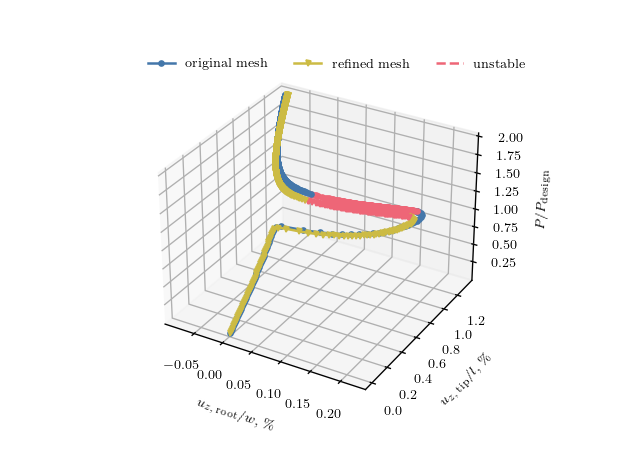

In [10]:
from resources import pynastran_utils, plot_utils

# Define dictionary with names of input files
input_name_dict = {"original mesh": "sol_106_14976_elements_epsu1e-4",
                   "refined mesh": "sol_106_48300_elements"}
sol_106_op2_dict = {}  # dictionary to store op2 objects

# Initialize dictionary of root and tip node ids
root_node_id_dict = {"original mesh": 455,
                     "refined mesh": 1362}  # dictionary to store ids of nodes where max displacement occurs
tip_node_xyz = np.array([W/2, L, 0])  # [mm] coordinates of tip node
tip_node_id_dict = {}  # dictionary to store ids of tip nodes

# Initialize dictionary to store eigenvalues, nondimensional loads and displacements
eigenvalues_dict = {}
nondimensional_loads_dict = {}
nondimensional_displacements_dict = {}

# Create 3D plot of equilibrium diagram
figsize_scale = 1/.6  # scale factor for figure size
fig = plt.figure(figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))  # create a figure
ax_3d = plt.axes(projection="3d")  # create 3D axes
stable_lines = []  # list to store proxy artists for the legend

# Iterate over the different meshes
for count, key in enumerate(input_name_dict):
    # Read op2 file of nonlinear analysis
    op2_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, f"{input_name_dict[key]}.op2")
    sol_106_op2_dict[key] = read_op2(op2_filename=op2_filepath, load_geometry=True, debug=None)
    
    # Find tip node id
    nodes_xyz_array = np.array([node.xyz for node in sol_106_op2_dict[key].nodes.values()])  # get nodes' coordinates
    tip_node_id_dict[key] = np.argmin(np.linalg.norm(nodes_xyz_array - tip_node_xyz, axis=1)) + 1  # find id of tip node
    
    # Read load-displacement history
    _, loads, displacements = pynastran_utils.read_load_displacement_history_from_op2(
        op2=sol_106_op2_dict[key], node_ids=[root_node_id_dict[key], tip_node_id_dict[key]])
    
    # Read eigenvalues
    f06_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, f"{input_name_dict[key]}.f06")  # path of f06 file
    eigenvalues_dict[key] = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_filepath)  # read eigenvalues from f06 file

    # Nondimensionalize loads and displacements
    nondimensional_loads_dict[key] = loads[FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/DESIGN_LOAD
    nondimensional_displacements_dict[key] = {"root": displacements[root_node_id_dict[key]][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/W,
                                         "tip": displacements[tip_node_id_dict[key]][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/L}

    # Plot load-displacement curve
    plot_utils.plot_3d_load_displacements_stability(
        axes=ax_3d,
        displacements1=nondimensional_displacements_dict[key]["root"]*100,
        displacements2=nondimensional_displacements_dict[key]["tip"]*100,
        loads=nondimensional_loads_dict[key],
        eigenvalues=eigenvalues_dict[key],
        marker=MARKERS[count],
        color=COLORS[count])
    stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[count], color=COLORS[count], label=key))  # create proxy artist for the legend

# Add proxy artist for unstable lines and create legend
fig.legend(handles=stable_lines + [unstable_line], bbox_to_anchor=(.87, .9), frameon=False, ncol=3)

# Set axes labels and grid
ax_3d.set_xlabel("$u_{z,\,\mathrm{root}}/w$, \%")
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$, \%")
ax_3d.set_zlabel("$P/P_\mathrm{design}$")
ax_3d.grid(visible=True)

# Show plot and save figure
plt.show()
bounding_box = fig.bbox_inches.from_bounds(1.2, .2, 3.4, 3.2)  # create bounding box for figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "MeshConvergenceVerification.pdf"), bbox_inches=bounding_box, pad_inches=0)

Calculate percentage difference of refined mesh with respect to original mesh in terms of final displacements and of applied load where stability is lost.

In [11]:
# Find applied load at limit point
first_negative_eigenvalue_index_dict = {}  # dictionary to store index of first negative eigenvalue
limit_point_nondimensional_applied_load = {}  # dictionary to store nondimensional applied load at limit point
for key in eigenvalues_dict:
    first_negative_eigenvalue_index_dict[key] = np.where(eigenvalues_dict[key][0, :] < 0)[0][0]  # find index of first negative eigenvalue
    limit_point_nondimensional_applied_load[key] = np.mean(
        nondimensional_loads_dict[key][first_negative_eigenvalue_index_dict[key] - 1:first_negative_eigenvalue_index_dict[key] + 1])  # calculate nondimensional applied load at limit point as the mean between the last stable and first unstable load

# Print applied loads and percentage difference
print(f"""
Nondimensional applied load at first limit point:
- original mesh: {limit_point_nondimensional_applied_load["original mesh"]:.2f}
- refined mesh: {limit_point_nondimensional_applied_load["refined mesh"]:.2f}
Percentage difference of original mesh w.r.t. refined one: {
    (limit_point_nondimensional_applied_load["original mesh"]/limit_point_nondimensional_applied_load["refined mesh"] - 1)*100:.1f} %""")


Nondimensional applied load at first limit point:
- original mesh: 1.42
- refined mesh: 1.36
Percentage difference of original mesh w.r.t. refined one: 4.3 %


Plot buckling mode of converged mesh.

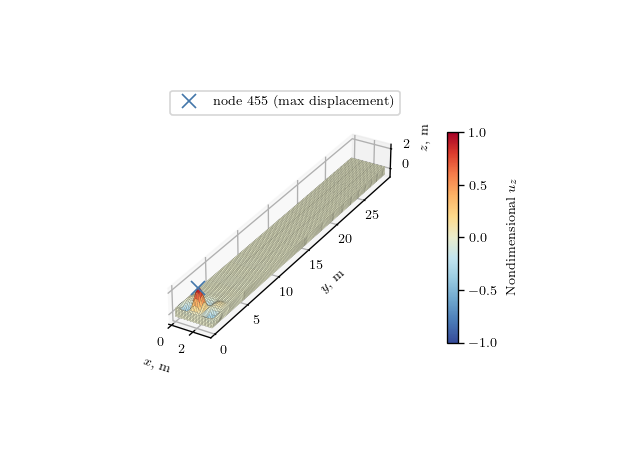

In [12]:
# Read op2 file
input_name = "sol_105_14976_elements"
sol_105_op2 = read_op2(os.path.join(NOTEBOOK_18_DIRECTORY_PATH, f"{input_name}.op2"), load_geometry=True, debug=None)

# Plot buckling mode
fig = plt.figure(figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))  # create a figure
ax_3d = plt.axes(projection="3d")  # create 3D axes
amplification_factor = 2
clim = [-1., 1.]
_, ax, cbar = plot_utils.plot_eigenvector(
    axes=ax_3d, op2=sol_105_op2, subcase_id=SECOND_SUBCASE_ID, displacement_component='tz', colormap='sunset',
    displacement_amplification_factor=amplification_factor, unit_scale_factor=1e-3, clim=clim)  # plot buckling mode converting from mm to m

# Plot max displacement node
plt.rcParams.update({'lines.markersize': 8})
plot_utils.plot_max_displacement_node(
    axes=ax, op2=sol_105_op2, displacement_amplification_factor=amplification_factor, unit_scale_factor=1e-3)
ax.legend(bbox_to_anchor=(.85, .92))  # create legend

# Define function to adjust axes ticks and labels' position
def adjust_3d_plot(axes, colorbar=None):
    axes.locator_params(axis="x", nbins=3)  # set number of ticks of x-axis
    axes.locator_params(axis="z", nbins=2)  # set number of ticks of z-axis
    axes.tick_params(axis="x", which="major", pad=-2)
    axes.tick_params(axis="y", which="major", pad=15)  # adjust position of ticks' label of y-axis
    axes.tick_params(axis="z", which="major", pad=1)  # adjust position of ticks' label of z-axis
    axes.xaxis.labelpad = -4  # adjust position of x-axis's label
    axes.yaxis.labelpad = 50  # adjust position of y-axis's label
    axes.zaxis.labelpad = -1  # adjust position of z-axis's label
    if colorbar is not None:
        colorbar.ax.set_position(colorbar.ax.get_position().shrunk(1.0, .59))  # decrease colorbar size
        colorbar.ax.set_position(colorbar.ax.get_position().translated(-.06, 0.15))  # move colorbar upwards

# Adjust plot and show
adjust_3d_plot(ax, cbar)
plt.show()

# Save figure
bounding_box_deformation = fig.bbox_inches.from_bounds(1.1, .7, 3.3, 2.5)  # create bounding box for figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, f"InitialBucklingMode.png"), bbox_inches=bounding_box_deformation, pad_inches=0, dpi=500)

# Reset default sizes
plt.rcParams.update({'lines.markersize': DEFAULT_MARKER_SIZE})

Plot load-displacement diagram for original mesh in terms of local displacement $u_{z,\,287}$ nondimensionalized by the box beam width $w$.

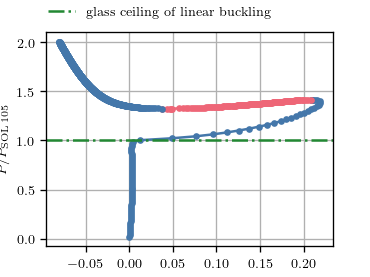

In [13]:
# Plot load-displacement diagram
fig, ax = plt.subplots(figsize=(FIG_WIDTH_INCHES, FIG_HEIGHT_INCHES))
key = "original mesh"
plot_utils.plot_2d_load_displacements_stability(
    axes=ax,
    displacements=nondimensional_displacements_dict[key]['root']*100,
    loads=nondimensional_loads_dict[key],
    eigenvalues=eigenvalues_dict[key],
    marker=MARKERS[0],
    color=COLORS[0])

# Plot glass ceiling of linear buckling
glass_ceiling_handle = ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle="-.", label="glass ceiling of linear buckling")

# Create proxy artists for the legend
stable_line = Line2D([0], [0], linestyle="-", marker="o", color=COLORS[0], label="stable")
unstable_line = Line2D([0], [0], linestyle="--", marker="o", color=UNSTABLE_COLOR, label="unstable")

# Display the legend with the proxy artists
fig.legend(handles=[stable_line, unstable_line, glass_ceiling_handle], frameon=False, loc="upper center", bbox_to_anchor=(0.43, 1.15))

# Set plot appearance
ax.set_xlabel(f"$u_{{z,\,{root_node_id_dict[key]:d}}}/w$, \%")
ax.set_ylabel("$P/P_\mathrm{SOL\,105}$")
ax.grid()
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "InitialRootDisplacement.pdf"), bbox_inches="tight", pad_inches=0)

Plot deformation over the box beam root before and after the snap.

Deformation before snap:


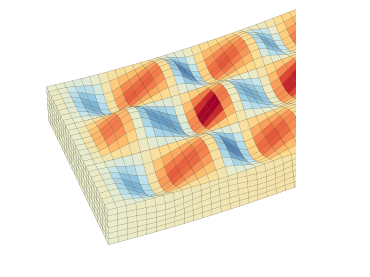

Deformation after snap:


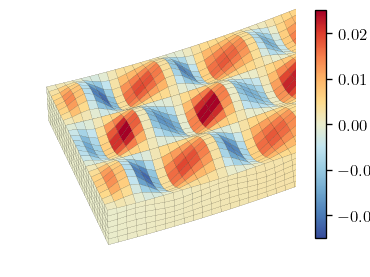

In [14]:
# Increase font size because figures are rendered side by side in the paper
plt.rcParams.update({'font.size': DEFAULT_FONT_SIZE/.8})

# Plot deformation just before limit point
nondimensional_load_before_limit_point = nondimensional_loads_dict[key][first_negative_eigenvalue_index_dict[key] - 1]
print("Deformation before snap:")
amplification_factor = 50  # amplification factor for displacements
clim = [-.025, .025]  # color limits for deformation plot
fig, ax, cbar = plot_utils.plot_deformation(
    op2=sol_106_op2_dict[key], load_step=first_negative_eigenvalue_index_dict[key], displacement_component='rx',
    colormap='sunset', unit_scale_factor=1e-3, displacement_amplification_factor=amplification_factor, clim=clim)  # plot buckling mode converting from mm to m

# Adjust plot and zoom into root region
adjust_3d_plot(ax)
cbar.remove()
ax.set_xlim(0, W*1e-3)
ax.set_ylim(0, 4*H*1e-3)
ax.set_zlim(-H/2*1e-3, H*1e-3)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f"get_{a}lim")() for a in 'xyz')])
plt.axis('off')
ax.view_init(40, -20)
plt.show()

# Save figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "BeforeSnap.pdf"), bbox_inches='tight', pad_inches=0)

# Find closest converged iteration to applied load after limit point
skip = 10  # number of increments to skip for selection of applied load after snap
subsequent_values = nondimensional_loads_dict[key][first_negative_eigenvalue_index_dict[key] + skip:]  # consider only applied loads after snap
closest_index_in_subsequent = np.argmin(np.abs(nondimensional_load_before_limit_point - subsequent_values))  # find index of closest value to applied load at first limit point
closest_index = first_negative_eigenvalue_index_dict[key] + skip + closest_index_in_subsequent  # sum found index to index of first negative eigenvalue

# Plot deformation after limit point
print("Deformation after snap:")
fig, ax, cbar = plot_utils.plot_deformation(
    op2=sol_106_op2_dict[key], load_step=closest_index + 1, displacement_component='rx', clim=clim,
    colormap='sunset', unit_scale_factor=1e-3, displacement_amplification_factor=amplification_factor)  # plot buckling mode converting from mm to m

# Adjust plot and zoom into root region
adjust_3d_plot(ax)
cbar.ax.set_position(cbar.ax.get_position().shrunk(1.0, .82))  # decrease colorbar size
cbar.ax.set_position(cbar.ax.get_position().translated(0, .14))  # move colorbar upwards
ax.set_xlim(0, W*1e-3)
ax.set_ylim(0, 4*H*1e-3)
ax.set_zlim(-H/2*1e-3, H*1e-3)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f"get_{a}lim")() for a in 'xyz')])
plt.axis('off')
ax.view_init(40, -20)
plt.show()

# Save figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "AfterSnap.pdf"), bbox_inches="tight", pad_inches=0)

Plot the eigenvalues of the tangent stiffness matrix.

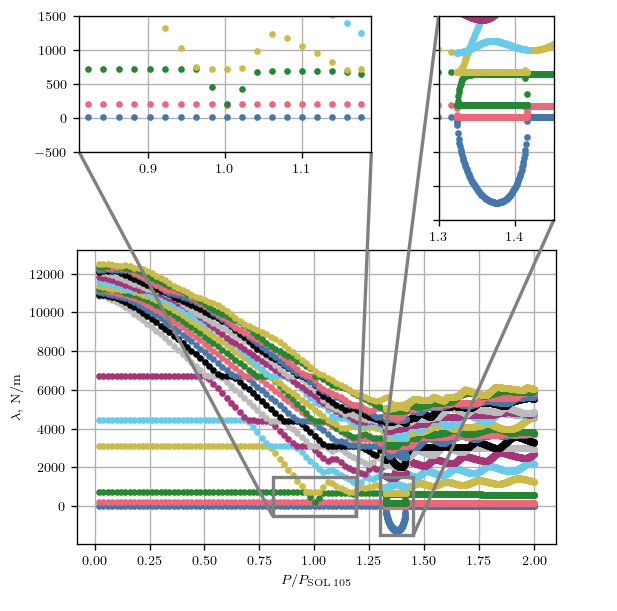

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

# Create the figure
plt.rcParams.update({"font.size": DEFAULT_FONT_SIZE})  # reset default font size
fig, ax = plt.subplots(figsize=(TEXTWIDTH_INCHES, FIG_HEIGHT_INCHES*2.2))
fig.subplots_adjust(top=.59)

# Plot eigenvalues vs applied load
plt.plot(nondimensional_loads_dict[key], eigenvalues_dict[key].T*1e3, "o")  # convert eigenvalues from N/mm to N/m
plt.ylabel("$\lambda,\,\mathrm{N/m}$")
plt.xlabel("$P/P_\mathrm{SOL\,105}$")
plt.grid(True)

# Define zoom level
zoom_level = 3.5

# Create the first zoomed inset
x1, x2 = .81, 1.19  # region of interest for the first zoomed inset
axins1 = zoomed_inset_axes(ax, zoom_level, loc="upper left", bbox_to_anchor=(-.01, 1.82), bbox_transform=ax.transAxes)
axins1.plot(nondimensional_loads_dict[key], eigenvalues_dict[key].T * 1e3, "o")
axins1.set_xlim(x1, x2)  # Adjust the limits as needed
axins1.set_ylim(-500, 1500)    # Adjust the limits as needed
axins1.set_xticks([0.9, 1.0, 1.1])
mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5", linewidth=2, zorder=2)  # Connect to the region of interest

# Create the second zoomed inset
x1, x2 = 1.3, 1.45  # region of interest for the second zoomed inset
axins2 = zoomed_inset_axes(ax, zoom_level, loc="upper right", bbox_to_anchor=(1.01, 1.82), bbox_transform=ax.transAxes)
axins2.plot(nondimensional_loads_dict[key], eigenvalues_dict[key].T * 1e3, "o")
axins2.set_xlim(x1, x2)  # Adjust the limits based on your region of interest
axins2.set_ylim(-1500, 1500)  # Adjust the limits as needed
axins2.tick_params(labelleft=False, labelbottom=True)
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=2, zorder=2)  # Connect to the region of interest

# Set the appearance of the insets
axins1.grid(True)
axins2.grid(True)

# Adjust layout for better appearance
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "Eigenvalues.pdf"), pad_inches=0, bbox_inches='tight')

Plot load-displacement diagram in terms of tip displacement $u_{z,\,\mathrm{tip}}$ nondimensionalized by the box beam length $l$.

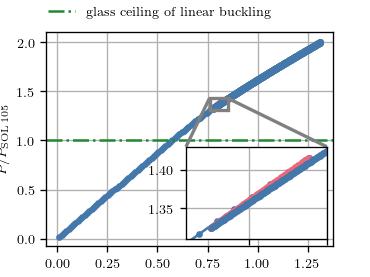

In [16]:
# Plot load-displacement diagram
fig, ax = plt.subplots()
plot_utils.plot_2d_load_displacements_stability(
    axes=ax,
    displacements=nondimensional_displacements_dict[key]['tip']*100,
    loads=nondimensional_loads_dict[key],
    eigenvalues=eigenvalues_dict[key],
    marker=MARKERS[0],
    color=COLORS[0])

# Plot glass ceiling of linear buckling
glass_ceiling_handle = ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle="-.", label="glass ceiling of linear buckling")

# Create zoomed inset
zoom_level = 7.8
axins = zoomed_inset_axes(ax, zoom_level, loc="lower right", bbox_to_anchor=(1., .005), bbox_transform=ax.transAxes)
plot_utils.plot_2d_load_displacements_stability(
    axes=axins,
    displacements=nondimensional_displacements_dict[key]['tip']*100,
    loads=nondimensional_loads_dict[key],
    eigenvalues=eigenvalues_dict[key],
    marker=MARKERS[0],
    color=COLORS[0])
x1, x2 = .76, .85
y1, y2 = 1.31, 1.43
axins.set_xlim(x1, x2)  # Adjust the limits as needed
axins.set_ylim(y1, y2)    # Adjust the limits as needed
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5", linewidth=2, zorder=2)  # Connect to the region of interest
axins.grid(True)
axins.tick_params(labelleft=True, labelbottom=False)

# Display the legend with the proxy artists
fig.legend(handles=[stable_line, unstable_line, glass_ceiling_handle], frameon=False, loc="upper center", bbox_to_anchor=(0.43, 1.15))

# Set plot appearance
ax.set_xlabel("$u_{z,\,tip}/l$, \%")
ax.set_ylabel("$P/P_\mathrm{SOL\,105}$")
ax.grid()
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "InitialTipDisplacement.pdf"), bbox_inches="tight", pad_inches=0)

Plot nonlinear analysis with coarse arc-length increments.

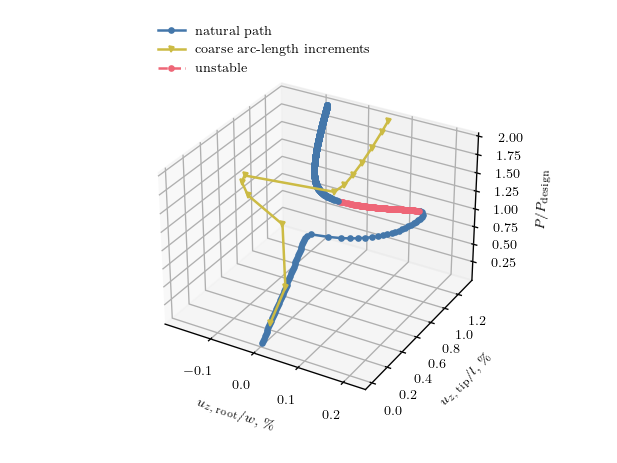

In [17]:
def plot_reference_natural_equilibrium_path(ax_3d):
    key = "original mesh"  # key of reference equilibrium path
    plot_utils.plot_3d_load_displacements_stability(axes=ax_3d,
                                                    displacements1=nondimensional_displacements_dict[key]["root"]*100,
                                                    displacements2=nondimensional_displacements_dict[key]["tip"]*100,
                                                    loads=nondimensional_loads_dict[key],
                                                    eigenvalues=eigenvalues_dict[key],
                                                    marker=MARKERS[0], color=COLORS[0])

# Create 3D plot of equilibrium diagram
fig = plt.figure(figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))  # create a figure
ax_3d = plt.axes(projection="3d")  # create 3D axes
stable_lines = []  # list to store proxy artists for the legend

# Plot reference natural equilibrium path
plot_reference_natural_equilibrium_path(ax_3d)
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[0], color=COLORS[0], label="natural path"))  # create proxy artist for the legend

# Plot equilibrium path for nonlinear analysis with coarse arc-length increments
# Read op2 file of nonlinear analysis
input_name = "sol_106_desiter5_equilibrium_path_verification"
op2_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, input_name + '.op2')
sol_106_op2 = read_op2(op2_filename=op2_filepath, load_geometry=True, debug=None)
    
# Read load-displacement history
key = "original mesh"  # key of reference equilibrium path
_, loads, displacements = pynastran_utils.read_load_displacement_history_from_op2(
    op2=sol_106_op2, node_ids=[root_node_id_dict[key], tip_node_id_dict[key]])
    
# Read eigenvalues
f06_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, input_name + '.f06')  # path of f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_filepath)  # read eigenvalues from f06 file

# Nondimensionalize loads and displacements of first subcase
nondimensional_loads = loads[FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/DESIGN_LOAD
coarse_increments_nondimensional_displacements_dict = {
    "root": displacements[root_node_id_dict[key]][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/W,
    "tip": displacements[tip_node_id_dict[key]][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/L}

# Plot load-displacement curve
no_first_subcase_increments = len(nondimensional_loads)
plot_utils.plot_3d_load_displacements_stability(
    axes=ax_3d,
    displacements1=coarse_increments_nondimensional_displacements_dict["root"]*100,
    displacements2=coarse_increments_nondimensional_displacements_dict["tip"]*100,
    loads=nondimensional_loads,
    eigenvalues=eigenvalues[:, :no_first_subcase_increments],
    marker=MARKERS[1],
    color=COLORS[1])
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[1], color=COLORS[1], label="coarse arc-length increments"))  # create proxy artist for the legend

# Add proxy artist for unstable lines and create legend
fig.legend(handles=stable_lines + [unstable_line], bbox_to_anchor=(.62, 0.97), frameon=False)

# Set axes labels and grid
ax_3d.set_xlabel("$u_{z,\,\mathrm{root}}/w$, \%")
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$, \%")
ax_3d.set_zlabel("$P/P_\mathrm{design}$")
ax_3d.grid(visible=True)

# Show plot and save figure
plt.show()
bounding_box = fig.bbox_inches.from_bounds(1.2, .2, 3.4, 3.5)  # create bounding box for figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "CoarseArcLengthIncrements.pdf"), bbox_inches=bounding_box, pad_inches=0)

Plot nonlinear analysis unloading the structure from the coarse arc-length result.

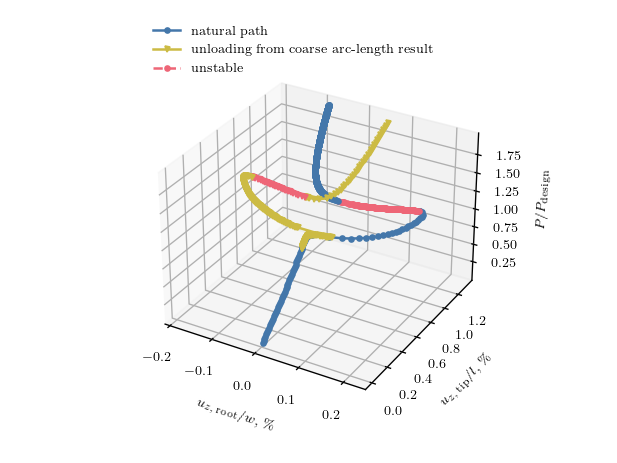

In [18]:
# Create 3D plot of equilibrium diagram
fig = plt.figure(figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))  # create a figure
ax_3d = plt.axes(projection="3d")  # create 3D axes
stable_lines = []  # list to store proxy artists for the legend

# Plot reference natural equilibrium path
plot_reference_natural_equilibrium_path(ax_3d)
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[0], color=COLORS[0], label="natural path"))  # create proxy artist for the legend

# Plot equilibrium path for nonlinear analysis with coarse arc-length increments
# Nondimensionalize loads and displacements of second subcase
nondimensional_loads = loads[SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/DESIGN_LOAD
nondimensional_displacements = {"root": displacements[root_node_id_dict[key]][SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/W,
                                "tip": displacements[tip_node_id_dict[key]][SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/L}

# Plot load-displacement curve
plot_utils.plot_3d_load_displacements_stability(axes=ax_3d,
                                                displacements1=nondimensional_displacements["root"]*100,
                                                displacements2=nondimensional_displacements["tip"]*100,
                                                loads=nondimensional_loads,
                                                eigenvalues=eigenvalues[:, no_first_subcase_increments:],
                                                marker=MARKERS[1], color=COLORS[1])
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[1], color=COLORS[1], label="unloading from coarse arc-length result"))  # create proxy artist for the legend

# Add proxy artist for unstable lines and create legend
fig.legend(handles=stable_lines + [unstable_line], bbox_to_anchor=(.72, 0.97), frameon=False)

# Set axes labels and grid
ax_3d.set_xlabel("$u_{z,\,\mathrm{root}}/w$, \%")
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$, \%")
ax_3d.set_zlabel("$P/P_\mathrm{design}$")
ax_3d.grid(visible=True)

# Show plot and save figure
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "UnloadingFromCoarseArcLengthResult.pdf"), bbox_inches=bounding_box, pad_inches=0)

Plot nonlinear analysis unloading the structure with MAXITER=3.

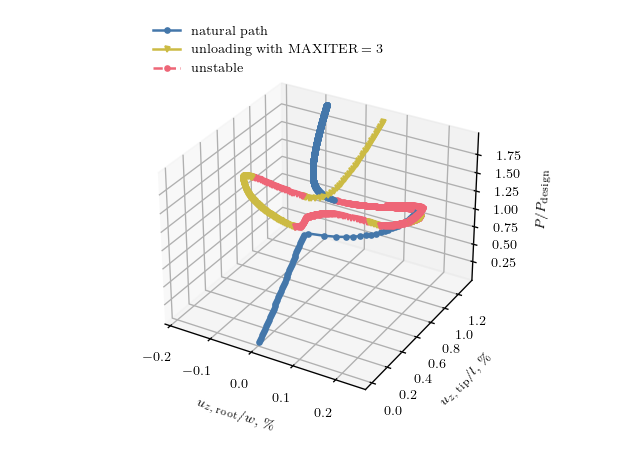

In [19]:
# Create 3D plot of equilibrium diagram
fig = plt.figure(figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))  # create a figure
ax_3d = plt.axes(projection="3d")  # create 3D axes
stable_lines = []  # list to store proxy artists for the legend

# Plot reference natural equilibrium path
plot_reference_natural_equilibrium_path(ax_3d)
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[0], color=COLORS[0], label="natural path"))  # create proxy artist for the legend

# Plot equilibrium path for nonlinear analysis with coarse arc-length increments
# Read op2 file of nonlinear analysis
input_name = "sol_106_desiter5_equilibrium_path_verification_maxiter3"
op2_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, input_name + '.op2')
sol_106_op2 = read_op2(op2_filename=op2_filepath, load_geometry=True, debug=None)
    
# Read load-displacement history
_, loads, displacements = pynastran_utils.read_load_displacement_history_from_op2(
    op2=sol_106_op2, node_ids=[root_node_id_dict[key], tip_node_id_dict[key]])
    
# Read eigenvalues
f06_filepath = os.path.join(NOTEBOOK_18_DIRECTORY_PATH, input_name + '.f06')  # path of f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_filepath)  # read eigenvalues from f06 file

# Nondimensionalize loads and displacements of first subcase
nondimensional_loads = loads[SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/DESIGN_LOAD
nondimensional_displacements = {"root": displacements[root_node_id_dict[key]][SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/W,
                                "tip": displacements[tip_node_id_dict[key]][SECOND_SUBCASE_ID][:, Z_COMPONENT_INDEX]/L}

# Plot load-displacement curve
no_first_subcase_increments = loads[FIRST_SUBCASE_ID].shape[0]
plot_utils.plot_3d_load_displacements_stability(axes=ax_3d,
                                                displacements1=nondimensional_displacements["root"]*100,
                                                displacements2=nondimensional_displacements["tip"]*100,
                                                loads=nondimensional_loads,
                                                eigenvalues=eigenvalues[:, no_first_subcase_increments:],
                                                marker=MARKERS[1], color=COLORS[1])
stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[1], color=COLORS[1], label="unloading with $\mathrm{MAXITER}=3$"))  # create proxy artist for the legend

# Add proxy artist for unstable lines and create legend
fig.legend(handles=stable_lines + [unstable_line], bbox_to_anchor=(.64, 0.97), frameon=False)

# Set axes labels and grid
ax_3d.set_xlabel("$u_{z,\,\mathrm{root}}/w$, \%")
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$, \%")
ax_3d.set_zlabel("$P/P_\mathrm{design}$")
ax_3d.grid(visible=True)

# Show plot and save figure
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "UnloadingMaxiter3.pdf"), bbox_inches=bounding_box, pad_inches=0)

## Optimization of the CRM-like box beam with nonlinear structural stability constraints <a name="optimization"></a>

***

Plot optimization history.

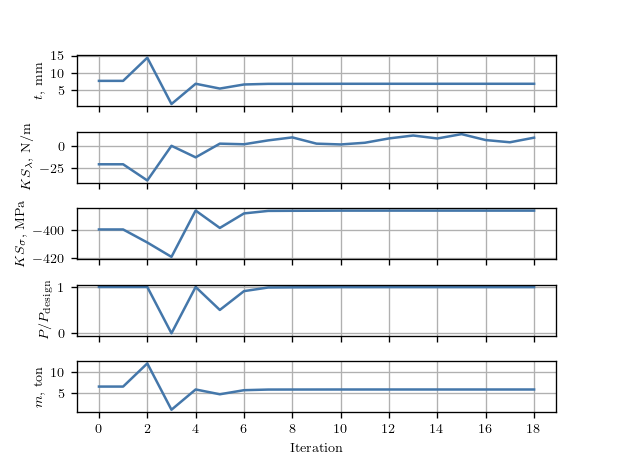

In [20]:
import openmdao.api as om  # make available the most common OpenMDAO classes and functions
from matplotlib.ticker import MaxNLocator  # import MaxNLocator class for axis ticks formatting

# Define path to the optimization sql file
recorder_filename = "sol_106_optimization3.sql"
recorder_filepath = os.path.join(NOTEBOOK_19_DIRECTORY_PATH, recorder_filename)

# Initialize the CaseReader object
cr = om.CaseReader(recorder_filepath)
    
# Extract driver cases without recursing into system or solver cases
driver_cases = cr.get_cases('driver', recurse=False)
    
# Prepare data structures for plotting
output_keys = list(driver_cases[0].outputs.keys())
no_outputs = len(output_keys)
histories = {key: np.array([case[key] for case in driver_cases]) for key in output_keys}  # retrieve histories of the functions
    
# Setup plot labels
y_labels = ["$t$, mm", "$KS_{\lambda}$, N/m", "$KS_{\sigma}$, MPa", "$P/P_\mathrm{design}$", "$m$, ton"]
            
# Create figure and axes for subplots
fig, axes = plt.subplots(no_outputs, 1, sharex=True, figsize=(FIG_WIDTH_INCHES*figsize_scale, FIG_HEIGHT_INCHES*figsize_scale))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
# Plot each history
iterations_array = np.arange(len(next(iter(histories.values()))))
for i, key in enumerate(histories):
    axes[i].plot(iterations_array, histories[key])  # plot the history of the function
    axes[i].set(ylabel=y_labels[i])  # set the y-axis label
    axes[i].grid()  # add grid to the plot
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))  # ensure x-axis ticks are integers
        
# Set x-axis label for the last subplot and display the plot
axes[-1].set(xlabel="Iteration")
plt.show()

# Save figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "OptimizationHistory.pdf"), bbox_inches='tight', pad_inches=0)

Print mass reduction, initial thickness and final thickness.

In [21]:
feasible_design_index = np.where(histories['nastran_solver.ks_stability'][:, 0] <= 0)[0][-1]
mass_reduction = (histories['nastran_solver.mass'][feasible_design_index, 0]/histories['nastran_solver.mass'][0, 0] - 1)*100
initial_thickess = histories['nastran_solver.t'][0, 0]
final_thickness = histories['nastran_solver.t'][feasible_design_index, 0]
print(f"""
Initial thickness: {initial_thickess:.1f} mm
Final feasible thickness: {final_thickness:1.1f} mm
Mass reduction: {mass_reduction:.1f} %""")


Initial thickness: 7.7 mm
Final feasible thickness: 6.9 mm
Mass reduction: -10.9 %


Plot load-displacement diagrams.

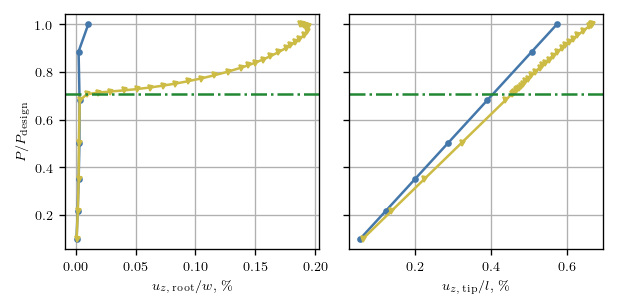

In [22]:
from resources import pynastran_utils, plot_utils
from pyNastran.op2.op2 import read_op2

# Design load is equal to linear buckling load of initial structure under distributed non-follower forces
design_load = 12517.  # [N]

# Make list with root and tip node IDs
key = "original mesh"
plot_node_ids = [root_node_id_dict[key], tip_node_id_dict[key]]

# Initialize dictionary with names of input files
input_name_dict = {"initial structure": "sol_106_optimization_start",
                   "optimized structure": "sol_106_optimization3_feasible"}

# Create one figure with two subplots side by side
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(TEXTWIDTH_INCHES, TEXTWIDTH_INCHES*.5))
stable_lines = []

# Read eigenvalues, load and displacement histories and plot load-displacement diagrams
eigenvalues_dict = {}
sol_106_op2_dict = {}
nondimensional_loads_dict = {}
reference_lengths = [W, L]  # reference lengths for nondimensionalization of displacements
for i, (key, input_name) in enumerate(input_name_dict.items()):

    # Read eigenvalues
    f06_path = os.path.join(NOTEBOOK_19_DIRECTORY_PATH, input_name + '.f06')  # path to .f06 file
    eigenvalues_dict[key] =pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

    # Read load and displacement histories
    sol_106_op2_dict[key] = read_op2(os.path.join(NOTEBOOK_19_DIRECTORY_PATH, input_name + '.op2'), load_geometry=True, debug=None)
    _, loads, displacements = pynastran_utils.read_load_displacement_history_from_op2(
        op2=sol_106_op2_dict[key], node_ids=plot_node_ids)
    nondimensional_loads_dict[key] = loads[FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/design_load
        
    # Plot load vs displacement for each node
    for j, node_id in enumerate(plot_node_ids):
        plot_utils.plot_2d_load_displacements_stability(
            axes[j],
            displacements[node_id][FIRST_SUBCASE_ID][:, Z_COMPONENT_INDEX]/reference_lengths[j]*100,
            nondimensional_loads_dict[key],
            eigenvalues_dict[key],
            MARKERS[i], COLORS[i])
    
    # Create proxy artists for stable segments
    stable_lines.append(Line2D([0], [0], linestyle='-', marker=MARKERS[i], color=COLORS[i], label=key))

# Plot linear buckling load line for optimized structure
sol_105_op2 = read_op2(os.path.join(NOTEBOOK_19_DIRECTORY_PATH, "sol_105_optimization3_feasible.op2"), load_geometry=True, debug=None)
linear_buckling_load = sol_105_op2.eigenvectors[SECOND_SUBCASE_ID].eigrs[0]
for ax in axes:
    ax.axhline(y=linear_buckling_load, color=GLASS_CEILING_COLOR, linestyle='-.')

# Create proxy artists for unstable segments
glass_ceiling_line = Line2D([0], [0], linestyle='-.', color=GLASS_CEILING_COLOR, label="linear buckling of optimized structure")

# Set plot appearance for the first subplot
axes[0].set_xlabel("$u_{z,\,\mathrm{root}}/w$, \%")
axes[0].set_ylabel("$P/P_\mathrm{design}$")
axes[0].grid(visible=True)

# Set plot appearance for the second subplot
axes[1].set_xlabel("$u_{z,\,\mathrm{tip}}/l$, \%")
axes[1].grid(visible=True)

# Make legend
plt.tight_layout()  # Ensures proper spacing between subplots
axes[0].legend(handles=stable_lines + [glass_ceiling_line], loc="upper left",
               ncols=2, bbox_to_anchor=(-.03, 1.25), frameon=False)  # add legend after tight_layout

# Show and save plot
plt.show()
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, "OptimizedLoadDisplacement.pdf"), bbox_inches='tight', pad_inches=0)

Plot deformation at design load of initial structure vs optimized structure.

Deformation of initial structure


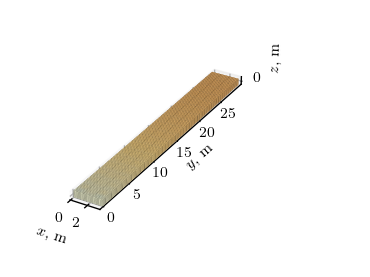

Deformation of optimized structure


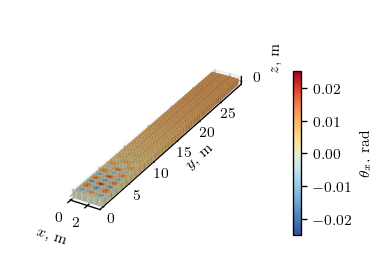

In [23]:
# Increase font size because figures will be side by side
plt.rcParams.update({'font.size': DEFAULT_FONT_SIZE/0.9})

# Plot deformation of initial structure
key = "initial structure"
print(f"Deformation of {key}")
clim = [-.025, .025]
fig, ax, cbar = plot_utils.plot_deformation(
    op2=sol_106_op2_dict[key], subcase_id=FIRST_SUBCASE_ID, displacement_component='rx', colormap='sunset',
    length_unit='m', unit_scale_factor=1e-3, clim=clim)
adjust_3d_plot(ax, cbar)
ax.set_zticks([0])
cbar.remove()
plt.show()
bbox_no_colorbar = fig.bbox_inches.from_bounds(.2, .2, 2.2, 1.8)  # create bounding box for figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, f"{key.replace(' ', '_')}_deformation.png"),
            bbox_inches=bbox_no_colorbar, pad_inches=0, dpi=500)

# Plot deformation of nonlinearly optimized structure
plt.rcParams.update({'font.size': DEFAULT_FONT_SIZE/0.91})
key = "optimized structure"
print(f"Deformation of {key}")
fig, ax, cbar = plot_utils.plot_deformation(
    op2=sol_106_op2_dict[key], subcase_id=FIRST_SUBCASE_ID, displacement_component='rx', colormap='sunset',
    length_unit='m', unit_scale_factor=1e-3, clim=clim)
adjust_3d_plot(ax, cbar)
ax.set_zticks([0])
plt.show()
bbox_colorbar = fig.bbox_inches.from_bounds(.2, .2, 3.0, 1.8)  # create bounding box for figure
fig.savefig(os.path.join(FIGURES_DIRECTORY_PATH, f"{key.replace(' ', '_')}_deformation.png"),
            bbox_inches=bbox_colorbar, pad_inches=0, dpi=500)

# Restore default font size
plt.rcParams.update({'font.size': DEFAULT_FONT_SIZE})